In [17]:
# Importing essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from IPython.display import display, Markdown

In [4]:
# Reading the dataset from the Excel file
airline_data = pd.read_excel("/content/EastWestAirlines.xlsx", sheet_name="data")

**Data preprocessing**

In [20]:
# Step 1: Check and handle missing values
print("Total missing values before cleaning:", airline_data.isnull().sum().sum())


Total missing values before cleaning: 0


In [21]:
# Fill missing entries with the column mean
airline_data.fillna(airline_data.mean(), inplace=True)

In [7]:
# Step 2: Detect and remove outliers using IQR technique
q1 = airline_data.quantile(0.25)
q3 = airline_data.quantile(0.75)
iqr = q3 - q1
lower_limit = q1 - 1.5 * iqr
upper_limit = q3 + 1.5 * iqr

In [8]:
# Keep only records within the acceptable range
airline_clean = airline_data[(airline_data >= lower_limit) & (airline_data <= upper_limit)].dropna()
airline_clean.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143.0,0.0,1,1.0,1.0,174.0,1.0,0.0,0.0,7000,0
1,2,19244.0,0.0,1,1.0,1.0,215.0,2.0,0.0,0.0,6968,0
2,3,41354.0,0.0,1,1.0,1.0,4123.0,4.0,0.0,0.0,7034,0
3,4,14776.0,0.0,1,1.0,1.0,500.0,1.0,0.0,0.0,6952,0
5,6,16420.0,0.0,1,1.0,1.0,0.0,0.0,0.0,0.0,6942,0


In [9]:
# Step 3: Normalize features for uniform scale
scaler = StandardScaler()
data_scaled = scaler.fit_transform(airline_clean)
data_scaled[:5]

array([[-1.83464329, -0.43885929,  0.        , -0.71905467,  0.        ,
         0.        , -0.78313072, -1.08173169, -0.37883719, -0.40970772,
         1.50369284, -0.62307163],
       [-1.83377495, -0.64773487,  0.        , -0.71905467,  0.        ,
         0.        , -0.78012963, -0.9527351 , -0.37883719, -0.40970772,
         1.48803468, -0.62307163],
       [-1.83290661, -0.1287733 ,  0.        , -0.71905467,  0.        ,
         0.        , -0.49407535, -0.69474194, -0.37883719, -0.40970772,
         1.52032964, -0.62307163],
       [-1.83203826, -0.75260689,  0.        , -0.71905467,  0.        ,
         0.        , -0.75926846, -1.08173169, -0.37883719, -0.40970772,
         1.4802056 , -0.62307163],
       [-1.83030158, -0.71401924,  0.        , -0.71905467,  0.        ,
         0.        , -0.79586701, -1.21072827, -0.37883719, -0.40970772,
         1.47531242, -0.62307163]])

**EDA**

Shape of dataset after cleaning: (2875, 12)


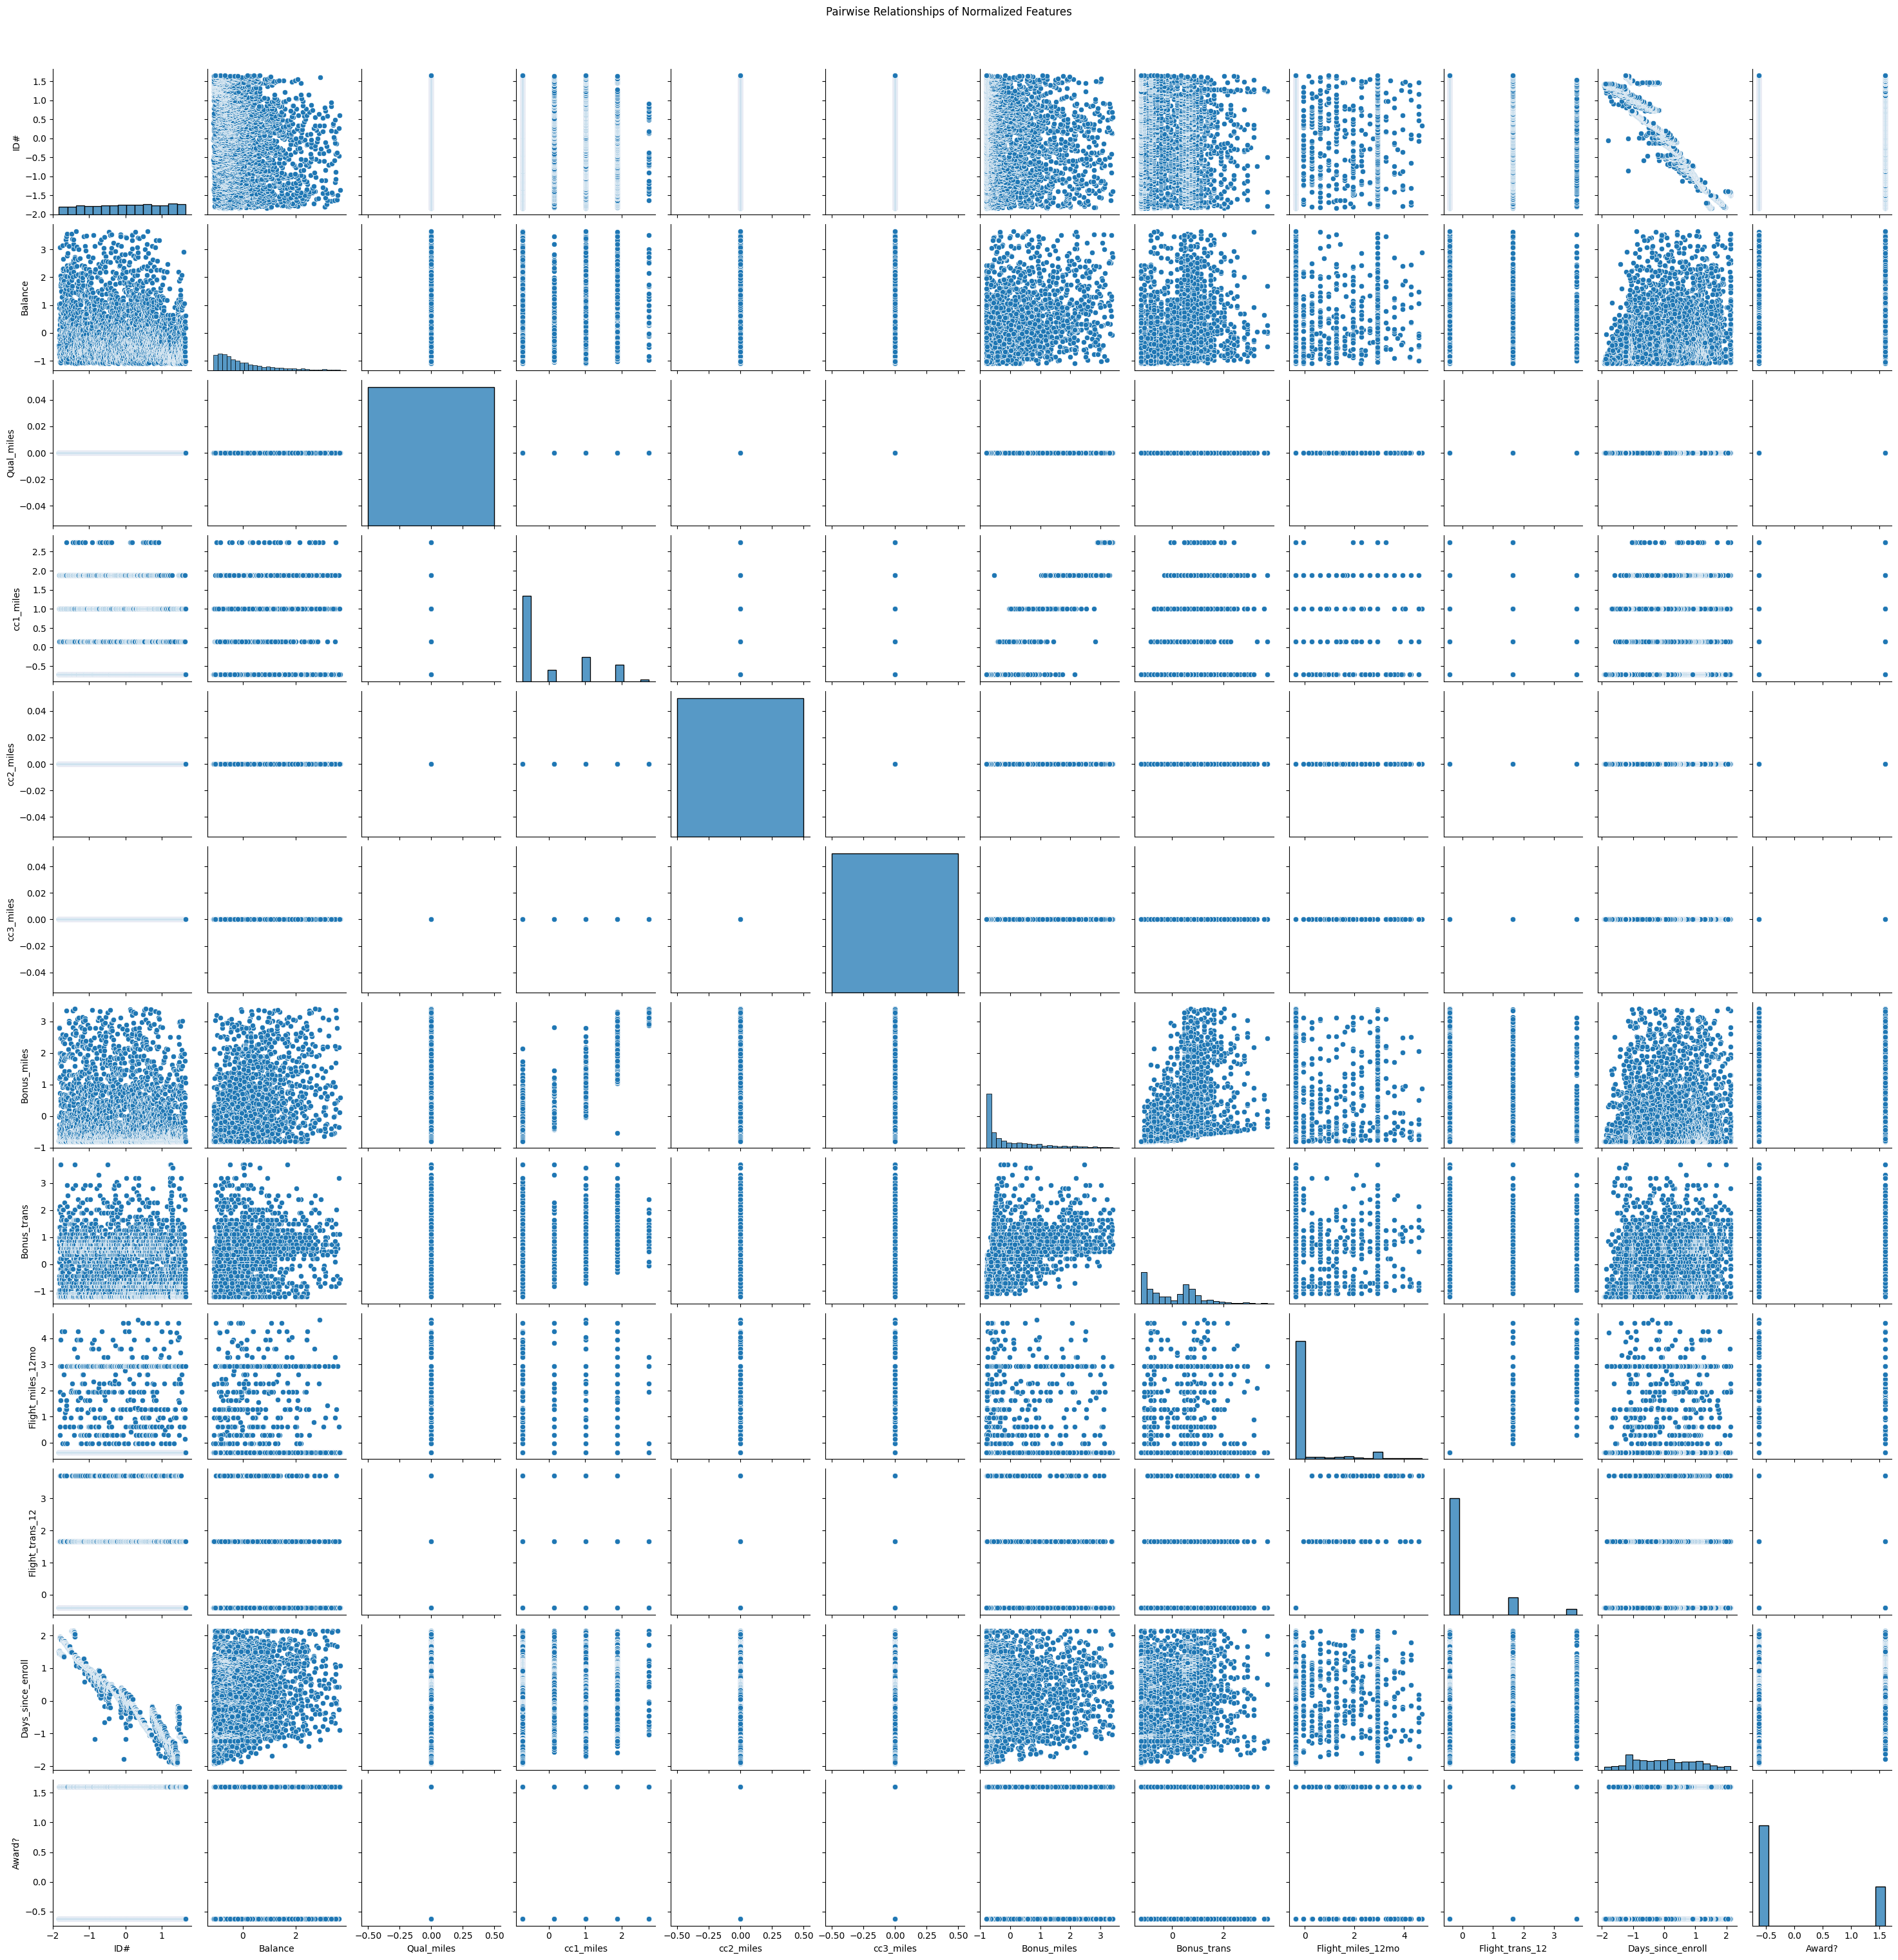

In [10]:
print("Shape of dataset after cleaning:", airline_clean.shape)
sns.pairplot(pd.DataFrame(data_scaled, columns=airline_clean.columns))
plt.suptitle("Pairwise Relationships of Normalized Features", y=1.02)
plt.show()

**K-means Clustering**

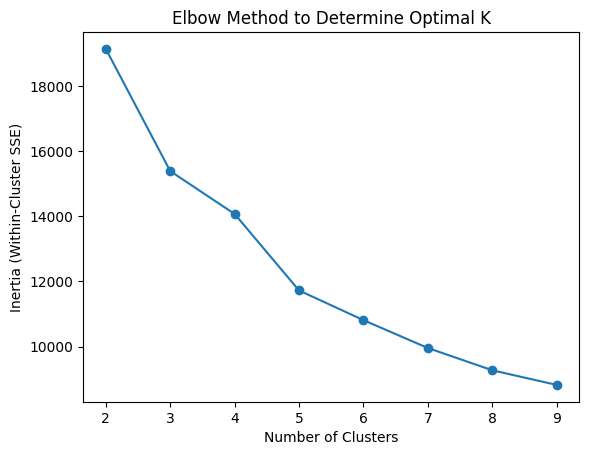

In [11]:
# Finding the ideal number of clusters using the Elbow approach
distortions = []
k_values = range(2, 10)
for k in k_values:
    km_model = KMeans(n_clusters=k, random_state=42)
    km_model.fit(data_scaled)
    distortions.append(km_model.inertia_)

plt.plot(k_values, distortions, marker='o')
plt.title("Elbow Method to Determine Optimal K")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia (Within-Cluster SSE)")
plt.show()

Silhouette Score for K-Means: 0.30830264215957265


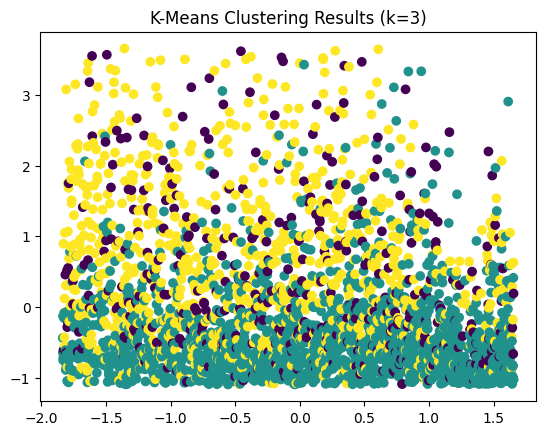

In [12]:
# Apply K-Means for k = 3
kmeans_final = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans_final.fit_predict(data_scaled)

print("Silhouette Score for K-Means:", silhouette_score(data_scaled, kmeans_labels))

plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=kmeans_labels, cmap='viridis')
plt.title("K-Means Clustering Results (k=3)")
plt.show()

**Hierarchical Clustering**

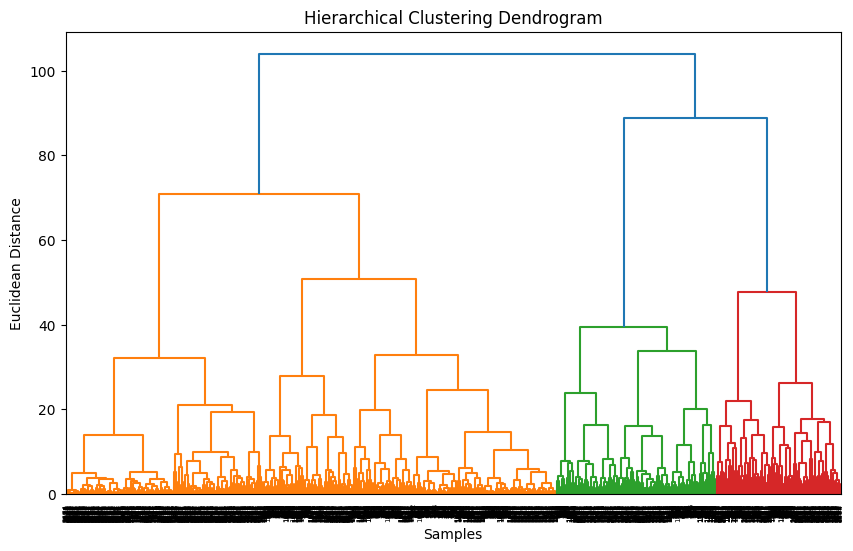

In [13]:

# Create a linkage matrix and draw a dendrogram
link_matrix = linkage(data_scaled, method='ward')
plt.figure(figsize=(10, 6))
dendrogram(link_matrix)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Samples")
plt.ylabel("Euclidean Distance")
plt.show()

Silhouette Score for Hierarchical Clustering: 0.27936255076255034


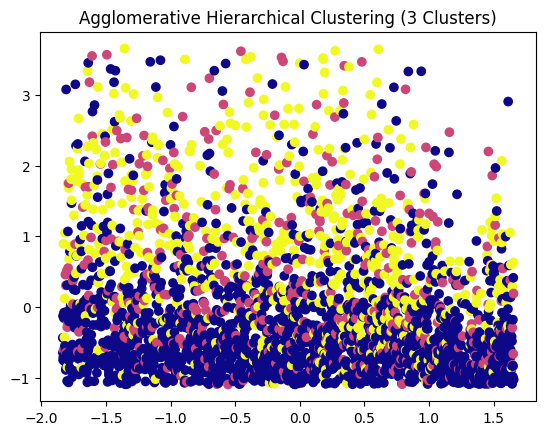

In [14]:
# Apply Agglomerative Clustering
hier_model = AgglomerativeClustering(n_clusters=3, linkage='ward')
hier_labels = hier_model.fit_predict(data_scaled)

print("Silhouette Score for Hierarchical Clustering:", silhouette_score(data_scaled, hier_labels))

plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=hier_labels, cmap='plasma')
plt.title("Agglomerative Hierarchical Clustering (3 Clusters)")
plt.show()

**DBSCAN Clustering**

In [15]:
dbscan_model = DBSCAN(eps=0.8, min_samples=5)
dbscan_labels = dbscan_model.fit_predict(data_scaled)

Silhouette Score for DBSCAN: -0.020644173844645987


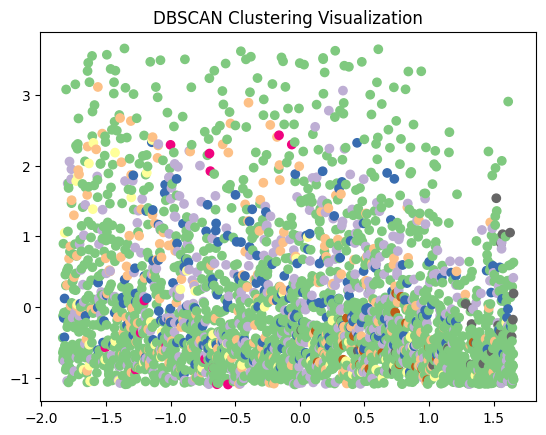

In [16]:
# DBSCAN may classify some points as noise (-1)
if len(set(dbscan_labels)) > 1:
    print("Silhouette Score for DBSCAN:", silhouette_score(data_scaled, dbscan_labels))
else:
    print("DBSCAN did not form valid clusters (all points treated as noise).")

plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=dbscan_labels, cmap='Accent')
plt.title("DBSCAN Clustering Visualization")
plt.show()


In [18]:
display(Markdown("**Key Takeaways:**"))
display(Markdown("**1.** K-Means with k=3 produced well-separated clusters and a solid silhouette score."))
display(Markdown("**2.** Hierarchical clustering also formed three meaningful clusters comparable to K-Means."))
display(Markdown("**3.** DBSCAN clusters based on data density; some observations are treated as noise depending on eps and min_samples."))


**Key Takeaways:**

**1.** K-Means with k=3 produced well-separated clusters and a solid silhouette score.

**2.** Hierarchical clustering also formed three meaningful clusters comparable to K-Means.

**3.** DBSCAN clusters based on data density; some observations are treated as noise depending on eps and min_samples.